In [1]:
import datetime
import pandas as pd
import sklearn
import numpy as np

pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.5f}'.format

In [91]:
# load network data
df_road = pd.read_csv("data/TMC_Identification.csv", sep=',', header=0)
# df_road = df_road[['tmc_code','intersection','start_latitude','start_longitude','end_latitude','end_longitude','miles']]

from shapely.geometry import LineString
from geopandas import GeoDataFrame

df_road['geometry'] = df_road.apply(
    lambda row: LineString([(row['start_longitude'], row['start_latitude']),
                             (row['end_longitude'], row['end_latitude'])]),
    axis=1
)
gdf_road = GeoDataFrame(df_road, geometry='geometry',crs="EPSG:4326")
# gdf_road.head(2) NORTHBOUND
# gdf_road[gdf_road['direction'].isin(['NORTHBOUND','WESTBOUND'])].explore(popup=True,)

In [88]:
route1_eve = ['112P15638', '112+15305', '112P15305', '112-17004','112N17005','112+16999','112+05773', '112+05774', '112P07805',
             '112+07807', '112P07807', '112P07808', '112+07809', '112P07809','112+07810','112P05038','112+05039', '112P05039', '112+05040',
             '112P05040', '112+05041', '112P05041', '112+05042','112P05042', '112+05043', '112P05043', '112P05044','112P05045',
             '112+05046', '112N13228']

route2_eve = ['112P15638', '112+15305', '112P15305', '112-17004','112N17005','112+16999', '112+05773', '112+05774', '112P05774', '112+05836',
              '112P05836', '112N13140', '112-13139', '112-13138',  '112-13137','112+16866',  '112+16867', '112N13228']


route1 = ['112-05043', '112N05044', '112-05044','112N05045', '112-05045',
          '112N05043', '112-05042','112N05042','112-05041', '112N05041', '112-05040','112N05040', '112-05039','112N05039','112N05038','112N07809',
          '112-05038','112N07808','112-07808', '112P16911','112-07807','112N15306',
         '112N07807', '112-07806', '112-07805', '112N07805', '112-06348', '112-06349', '112-15570', '112N15570','112-15639','112N15639',
         '112-15305', '112N15305', '112-15638', '112N15638']

route2 = ['112N05045', '112N05045','112-05045','112-05044', '112+13139', '112+13140', '112P13140', '112N05767', '112-05774', '112N05774', 
          '112-05773',  '112-07906', '112-16998', '112P17004', '112+17005', '112N15305','112-15638','112+13138','112N15638']

# gdf_road[gdf_road['tmc_code'].isin(route2_eve)].explore(style_kwds={"weight": 5})

In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to format x-axis labels as HH:MM
def format_minutes(x, pos):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"  # Format as HH:MM

# Plot the trends
def plot_trends(df,param_day_of_week, param_morning_or_evening, route_no):
    day_mapping = {0: "Monday",1: "Tuesday",2: "Wednesday",3: "Thursday",4: "Friday",5: "Saturday",6: "Sunday"}
    ax = df.groupby('minutes_since_midnight')[['delay_difference','simulated_diff_delay_1.0','simulated_diff_delay_0.1']].sum().plot(
        figsize=(12, 6), marker='o', linestyle='-'
    )
    
    # Convert x-axis to HH:MM format
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_minutes))
    
    # Add labels and title
    plt.xlabel("Time of Day (HH:MM)")
    plt.ylabel("Delay Difference (s)")
    plt.title(day_mapping.get(param_day_of_week, "Unknown Day") + ' ' + param_morning_or_evening + ' (' + route_no  +  ')' )
    
    plt.legend([
        f"Actual Delay Difference",
        f"Predicted Delay Difference",
        f"Predicted Delay Difference (-10%)",
    ])
    
    plt.show()

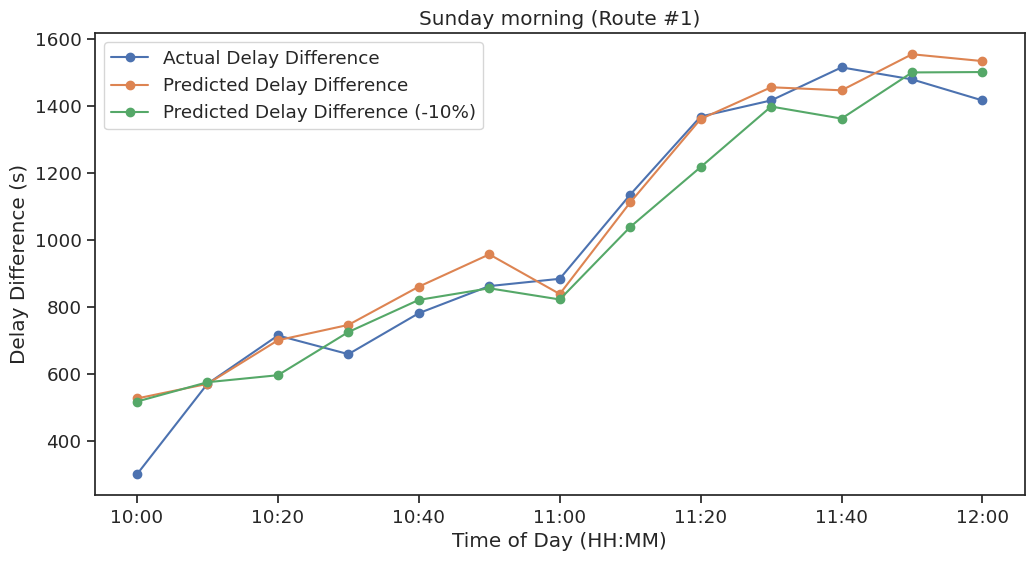

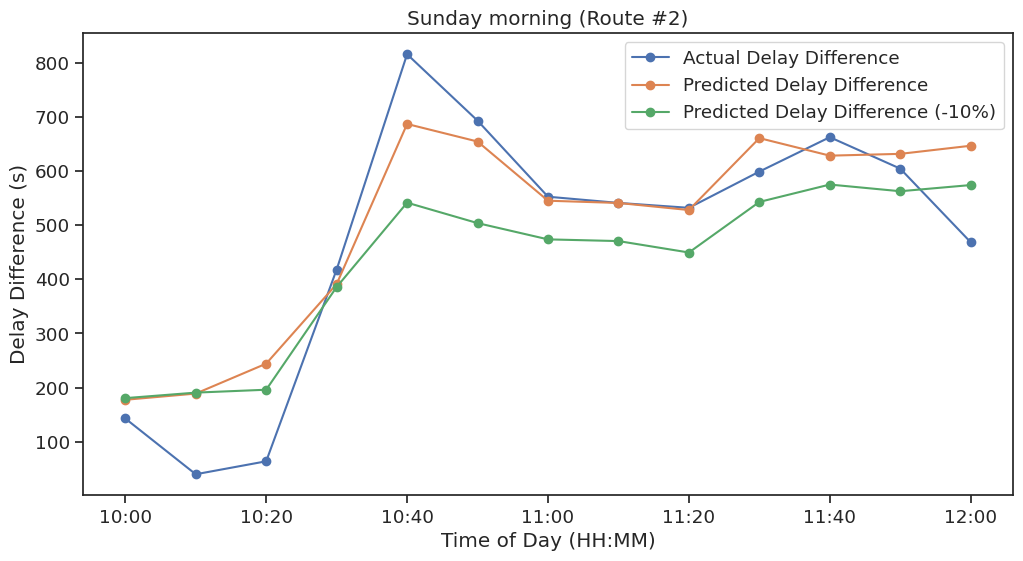

In [94]:
_param_morning_or_evening = 'morning'
_param_day_of_week= 6

gdf_road_weighted = gdf_road.merge(pd.read_csv('./output/delay_diff_dayofweek_'+str(_param_day_of_week)+_param_morning_or_evening+'_varying_demand.csv',header=0))
# gdf_road_weighted.head(2)
gdf_delay_route1 = gdf_road_weighted[gdf_road_weighted['tmc_code'].isin(route1)]
plot_trends(gdf_delay_route1,_param_day_of_week,_param_morning_or_evening,'Route #1')
gdf_delay_route1 = gdf_road_weighted[gdf_road_weighted['tmc_code'].isin(route2)]
plot_trends(gdf_delay_route1,_param_day_of_week,_param_morning_or_evening,'Route #2')

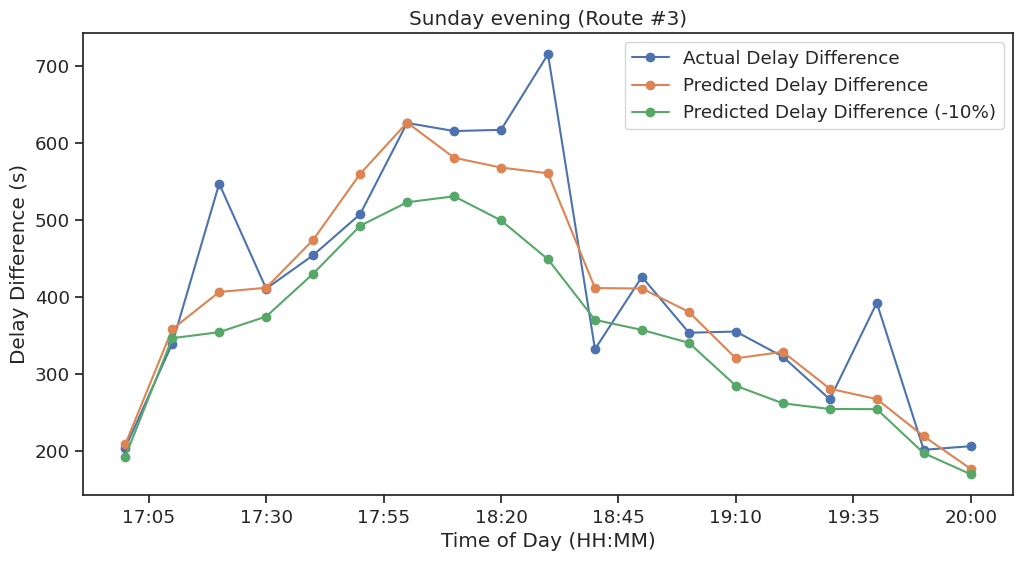

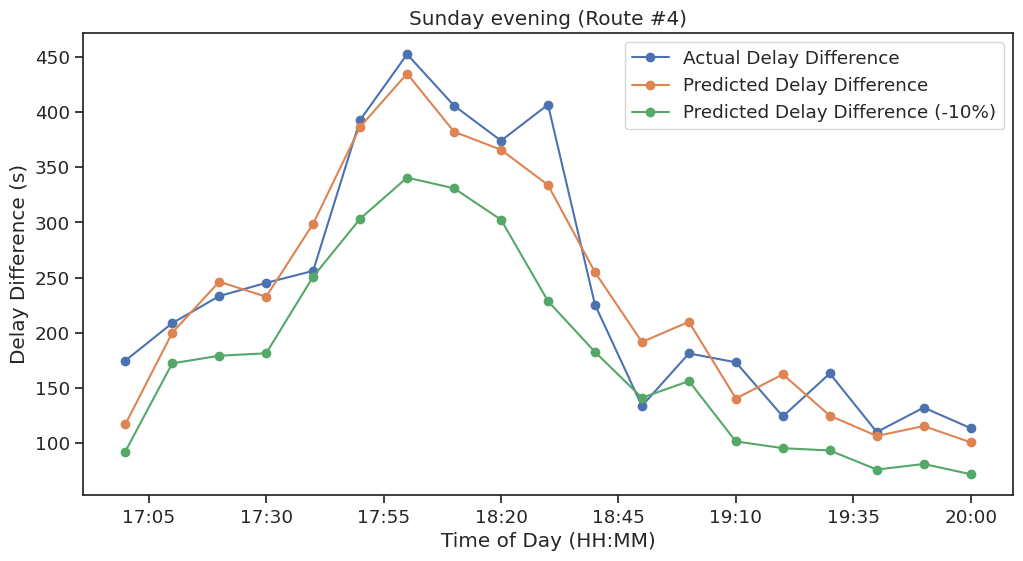

In [96]:
_param_morning_or_evening = 'evening'

gdf_road_weighted = gdf_road.merge(pd.read_csv('./output/delay_diff_dayofweek_'+str(_param_day_of_week)+_param_morning_or_evening+'_varying_demand.csv',header=0))
gdf_delay_route1 = gdf_road_weighted[gdf_road_weighted['tmc_code'].isin(route1_eve)]
plot_trends(gdf_delay_route1,_param_day_of_week,_param_morning_or_evening,'Route #3')
gdf_delay_route1 = gdf_road_weighted[gdf_road_weighted['tmc_code'].isin(route2_eve)]
plot_trends(gdf_delay_route1,_param_day_of_week,_param_morning_or_evening,'Route #4')

In [48]:
# feature_need1 = [f"simulated_diff_delay_{round(i,1)}" for i in np.arange(0.1, 1.1, 0.1)]
# total_delay_list1 = []
# for feature in feature_need1:
#     total_delay_list1.append(gdf_delay_route1[feature].sum())
# total_delay_list1

In [47]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# x_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]  
# y_values1 = total_delay_list1  # Scenario 1: random
# # y_values2 = total_delay_list2  # Scenario 2: according to top OD

# sns.set_theme(style="ticks", rc={'figure.figsize': (6, 6)}, font_scale=1.2)

# ax = sns.lineplot(x=x_values, y=y_values1, marker="o", color="blue")
# # sns.lineplot(x=x_values, y=y_values2, marker="s", color="red", label="Scenario 2 (top OD)")

# plt.xlabel("Travel demand reduction ratio", fontsize=16)
# plt.ylabel("Total predicted delay difference (s)", fontsize=14)
# plt.legend()
# plt.show()